# 2 Data wrangling<a id='2_Data_wrangling'></a>

# 2.1 Introduction<a id='2.1_Introduction'></a>

This step focuses on collecting data, organizing it, and making sure it's well defined. It can also be noted that some data cleaning can be done at this stage, but it's important not to be overzealous in the cleaning before we've explored the data to better understand it.

### 2.1.1 Recap Of Data Science Problem<a id='2.1.1_Recap_Of_Data_Science_Problem'></a>

Malware can be a pain when dealing with computers, criminals get easy to a consumer once the device is affected by a malware. Not just individuals are affected but even well-organized enterprises get affected in many ways. Microsoft takes this problem seriously and as such working tirelessly to improve the security on their devices.

The objective of this notebook is to explore data set from [Microsoft Malware Prediction](https://www.kaggle.com/c/microsoft-malware-prediction/data)

The goal is to predict a Windows machine’s probability of getting infected by various families of malware, based on different properties of that machine.

The first step here is to wrangle the data to better understand the width and breadth of the data.

## 2.2 Import Libraries<a id='2.2_Import Libraries'></a>

In [1]:
#Import important packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os
import pickle

In [2]:
# function to save file

def save_file(data, fname, dname):
    """Save a datafile (data) to a specific location (dname) and filename (fname)
    
    Currently valid formats are limited to CSV or PKL."""
    
    if not os.path.exists(dname):
        os.mkdir(dname)
        print(f'Directory {dname} was created.')
        
    fpath = os.path.join(dname, fname)
    
    
    if os.path.exists(fpath):
        print("A file already exists with this name.\n")

        yesno = None
        while yesno != "Y" and yesno != "N":
            yesno = input('Do you want to overwrite? (Y/N)').strip()[0].capitalize()
            if yesno == "Y":
                print(f'Writing file.  "{fpath}"')
                _save_file(data, fpath)
                break  # Not required
            elif yesno == "N":
                print('\nPlease re-run this cell with a new filename.')
                break  # Not required
            else:
                print('\nUnknown input, please enter "Y" or "N".')

    else:  # path does not exist, ok to save the file
        print(f'Writing file.  "{fpath}"')
        _save_file(data, fpath)
        
                
def _save_file(data, fpath):
    valid_ftypes = ['.csv', '.pkl']
    
    assert (fpath[-4:] in valid_ftypes), "Invalid file type.  Use '.csv' or '.pkl'"

    # Figure out what kind of file we're dealing with by name
    if fpath[-3:] == 'csv':
        data.to_csv(fpath, index=False)
    elif fpath[-3:] == 'pkl':
        with open(fpath, 'wb') as f:
            pickle.dump(data, f)

## 2.3 Load The Malware Data<a id='2.3_Load_The_Malware_Data'></a>

Thanks to Theo Viel for the kernel to help loading the data by reducing the memory usage. https://www.kaggle.com/theoviel/load-the-totality-of-the-data

Data set is huge, and as such we need to find a way to reduce memory. Will also manually assign data type to each variable for efficient Memory Management

In [3]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [4]:
dtypes = {
        'MachineIdentifier':                                    'category',
        'ProductName':                                          'category',
        'EngineVersion':                                        'category',
        'AppVersion':                                           'category',
        'AvSigVersion':                                         'category',
        'IsBeta':                                               'int8',
        'RtpStateBitfield':                                     'float16',
        'IsSxsPassiveMode':                                     'int8',
        'DefaultBrowsersIdentifier':                            'float16',
        'AVProductStatesIdentifier':                            'float32',
        'AVProductsInstalled':                                  'float16',
        'AVProductsEnabled':                                    'float16',
        'HasTpm':                                               'int8',
        'CountryIdentifier':                                    'int16',
        'CityIdentifier':                                       'float32',
        'OrganizationIdentifier':                               'float16',
        'GeoNameIdentifier':                                    'float16',
        'LocaleEnglishNameIdentifier':                          'int8',
        'Platform':                                             'category',
        'Processor':                                            'category',
        'OsVer':                                                'category',
        'OsBuild':                                              'int16',
        'OsSuite':                                              'int16',
        'OsPlatformSubRelease':                                 'category',
        'OsBuildLab':                                           'category',
        'SkuEdition':                                           'category',
        'IsProtected':                                          'float16',
        'AutoSampleOptIn':                                      'int8',
        'PuaMode':                                              'category',
        'SMode':                                                'float16',
        'IeVerIdentifier':                                      'float16',
        'SmartScreen':                                          'category',
        'Firewall':                                             'float16',
        'UacLuaenable':                                         'float32',
        'Census_MDC2FormFactor':                                'category',
        'Census_DeviceFamily':                                  'category',
        'Census_OEMNameIdentifier':                             'float16',
        'Census_OEMModelIdentifier':                            'float32',
        'Census_ProcessorCoreCount':                            'float16',
        'Census_ProcessorManufacturerIdentifier':               'float16',
        'Census_ProcessorModelIdentifier':                      'float16',
        'Census_ProcessorClass':                                'category',
        'Census_PrimaryDiskTotalCapacity':                      'float32',
        'Census_PrimaryDiskTypeName':                           'category',
        'Census_SystemVolumeTotalCapacity':                     'float32',
        'Census_HasOpticalDiskDrive':                           'int8',
        'Census_TotalPhysicalRAM':                              'float32',
        'Census_ChassisTypeName':                               'category',
        'Census_InternalPrimaryDiagonalDisplaySizeInInches':    'float16',
        'Census_InternalPrimaryDisplayResolutionHorizontal':    'float16',
        'Census_InternalPrimaryDisplayResolutionVertical':      'float16',
        'Census_PowerPlatformRoleName':                         'category',
        'Census_InternalBatteryType':                           'category',
        'Census_InternalBatteryNumberOfCharges':                'float32',
        'Census_OSVersion':                                     'category',
        'Census_OSArchitecture':                                'category',
        'Census_OSBranch':                                      'category',
        'Census_OSBuildNumber':                                 'int16',
        'Census_OSBuildRevision':                               'int32',
        'Census_OSEdition':                                     'category',
        'Census_OSSkuName':                                     'category',
        'Census_OSInstallTypeName':                             'category',
        'Census_OSInstallLanguageIdentifier':                   'float16',
        'Census_OSUILocaleIdentifier':                          'int16',
        'Census_OSWUAutoUpdateOptionsName':                     'category',
        'Census_IsPortableOperatingSystem':                     'int8',
        'Census_GenuineStateName':                              'category',
        'Census_ActivationChannel':                             'category',
        'Census_IsFlightingInternal':                           'float16',
        'Census_IsFlightsDisabled':                             'float16',
        'Census_FlightRing':                                    'category',
        'Census_ThresholdOptIn':                                'float16',
        'Census_FirmwareManufacturerIdentifier':                'float16',
        'Census_FirmwareVersionIdentifier':                     'float32',
        'Census_IsSecureBootEnabled':                           'int8',
        'Census_IsWIMBootEnabled':                              'float16',
        'Census_IsVirtualDevice':                               'float16',
        'Census_IsTouchEnabled':                                'int8',
        'Census_IsPenCapable':                                  'int8',
        'Census_IsAlwaysOnAlwaysConnectedCapable':              'float16',
        'Wdft_IsGamer':                                         'float16',
        'Wdft_RegionIdentifier':                                'float16',
        'HasDetections':                                        'int8'
        }

In [5]:
# list of numerical and categorical columns
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_columns = [c for c,v in dtypes.items() if v in numerics]
categorical_columns = [c for c,v in dtypes.items() if v not in numerics]

In [6]:
%%time

# Read 4000000 rows of the data into memory
df = pd.read_csv('.../train.csv',
                    nrows = 4000000,
                    dtype = dtypes)

CPU times: user 49.6 s, sys: 2.6 s, total: 52.2 s
Wall time: 52.9 s


In [7]:
df = reduce_mem_usage(df)

Mem. usage decreased to 766.97 Mb (0.0% reduction)


In [8]:
# Call the info method to see a summary of the data
df.info(verbose=True, null_counts=True) # without 'verbose' and 'null_counts' df.info doesn't show non null count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000000 entries, 0 to 3999999
Data columns (total 83 columns):
 #   Column                                             Non-Null Count    Dtype   
---  ------                                             --------------    -----   
 0   MachineIdentifier                                  4000000 non-null  category
 1   ProductName                                        4000000 non-null  category
 2   EngineVersion                                      4000000 non-null  category
 3   AppVersion                                         4000000 non-null  category
 4   AvSigVersion                                       4000000 non-null  category
 5   IsBeta                                             4000000 non-null  int8    
 6   RtpStateBitfield                                   3985554 non-null  float16 
 7   IsSxsPassiveMode                                   4000000 non-null  int8    
 8   DefaultBrowsersIdentifier                          1

We can already see some features are missing values. Glancing through, `PuaMode` has 1043 entry.

In [9]:
# Call the head method to print a few rows
df.head()

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7.0,0,NaN,53447.0,...,36144.0,0,NaN,0.0,0,0,0.0,0.0,10.0,0
1,000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,NaN,53447.0,...,57858.0,0,NaN,0.0,0,0,0.0,0.0,8.0,0
2,000007905a28d863f6d0d597892cd692,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,7.0,0,NaN,53447.0,...,52682.0,0,NaN,0.0,0,0,0.0,0.0,3.0,0
3,00000b11598a75ea8ba1beea8459149f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.0,0,NaN,53447.0,...,20050.0,0,NaN,0.0,0,0,0.0,0.0,3.0,1
4,000014a5f00daa18e76b81417eeb99fc,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1379.0,0,7.0,0,NaN,53447.0,...,19844.0,0,0.0,0.0,0,0,0.0,0.0,1.0,1


We can already see there are some missing values under `DefaultBrowsersIdentifier`, `Census_IsWIMBootEnabled` by just scrolling through the column headings.

## 2.4 Explore The Data<a id='2.4_Explore_The_Data'></a>

In [10]:
# Drop 'MachineIdentifier', won't be an essential at this moment
df = df.drop(columns=['MachineIdentifier'], axis=1)
df.head()

,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7.0,0,NaN,53447.0,1.0,...,36144.0,0,NaN,0.0,0,0,0.0,0.0,10.0,0
1,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,NaN,53447.0,1.0,...,57858.0,0,NaN,0.0,0,0,0.0,0.0,8.0,0
2,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,7.0,0,NaN,53447.0,1.0,...,52682.0,0,NaN,0.0,0,0,0.0,0.0,3.0,0
3,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.0,0,NaN,53447.0,1.0,...,20050.0,0,NaN,0.0,0,0,0.0,0.0,3.0,1
4,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1379.0,0,7.0,0,NaN,53447.0,1.0,...,19844.0,0,0.0,0.0,0,0,0.0,0.0,1.0,1


### 2.4.1 Calculate Missing Values Per Column<a id='2.4.1_Calculate_Missing_Values_Per_Column'></a>

Count the number of missing values in each column

In [11]:
# function to calculate percentage of missing values
# for each column
def missing_values_pct(df):
    pd.options.display.max_rows = 100 # number of rows to print since we have more columns
    missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
    missing.columns = ['count', '%']
    sorted_ms = missing.sort_values(by='%', ascending=False)
    return sorted_ms

In [12]:
# check missing values per column
missing_values_pct(df)

,count,%
PuaMode,3998957,99.973925
Census_ProcessorClass,3983597,99.589925
DefaultBrowsersIdentifier,3805510,95.137750
Census_IsFlightingInternal,3321519,83.037975
Census_InternalBatteryType,2841069,71.026725
Census_ThresholdOptIn,2539963,63.499075
Census_IsWIMBootEnabled,2536560,63.414000
SmartScreen,1424863,35.621575
OrganizationIdentifier,1233574,30.839350
SMode,241038,6.025950


`PuaMode` and `Census_ProcessorClass` has almost 100% missing values. Unfortunately we have other 5 features with over 50% missing values which raises some questions about the data and needs to be investigated further(we did sample the rows randomly). Good to know the target variable `HasDetections` has no missing values.

### 2.4.2 Select Only Non-Zero Columns<a id='2.4.2_Select_Only_Non_Zero_Columns'></a>

In [13]:
# Select columns with all nonzeros
non_zero_col = df.loc[:, df.all()]
non_zero_col.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000000 entries, 0 to 3999999
Data columns (total 55 columns):
 #   Column                                             Non-Null Count    Dtype   
---  ------                                             --------------    -----   
 0   ProductName                                        4000000 non-null  category
 1   EngineVersion                                      4000000 non-null  category
 2   AppVersion                                         4000000 non-null  category
 3   AvSigVersion                                       4000000 non-null  category
 4   DefaultBrowsersIdentifier                          194490 non-null   float16 
 5   AVProductStatesIdentifier                          3983815 non-null  float32 
 6   AVProductsInstalled                                3983815 non-null  float16 
 7   CountryIdentifier                                  4000000 non-null  int16   
 8   CityIdentifier                                     3

### 2.4.3 Columns Without NaN's<a id='2.4.3_Columns_Without_NaNs'></a>

In [14]:
# Select columns without NaN's
df_col_nonnan = df.loc[:, df.notnull().all()]
df_col_nonnan.head()

,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,IsSxsPassiveMode,HasTpm,CountryIdentifier,LocaleEnglishNameIdentifier,Platform,...,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_IsPortableOperatingSystem,Census_GenuineStateName,Census_ActivationChannel,Census_FlightRing,Census_IsSecureBootEnabled,Census_IsTouchEnabled,Census_IsPenCapable,HasDetections
0,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,0,1,29,-85,windows10,...,119,UNKNOWN,0,IS_GENUINE,Retail,Retail,0,0,0,0
1,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,0,1,93,64,windows10,...,31,UNKNOWN,0,OFFLINE,Retail,NOT_SET,0,0,0,0
2,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,0,1,86,49,windows10,...,30,FullAuto,0,IS_GENUINE,OEM:NONSLP,Retail,0,0,0,0
3,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,0,1,88,115,windows10,...,64,FullAuto,0,IS_GENUINE,OEM:NONSLP,Retail,0,0,0,1
4,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1379.0,0,0,1,18,75,windows10,...,31,FullAuto,0,IS_GENUINE,Retail,Retail,0,0,0,1


There are 38 columns without NaN's and that's roughly less than 50% of the total columns. This is a great concern for the other variables that have missing values and needs to be investigated further.

### 2.4.4 Columns With NaN's<a id='2.4.4_Columns_With_NaNs'></a>

In [15]:
# Select columns with atleast 1 NaN
df_col_nan = df.isnull().sum()
df_col_nan[df_col_nan > 0].sort_values(ascending=False)

PuaMode                                              3998957
Census_ProcessorClass                                3983597
DefaultBrowsersIdentifier                            3805510
Census_IsFlightingInternal                           3321519
Census_InternalBatteryType                           2841069
Census_ThresholdOptIn                                2539963
Census_IsWIMBootEnabled                              2536560
SmartScreen                                          1424863
OrganizationIdentifier                               1233574
SMode                                                 241038
CityIdentifier                                        146184
Wdft_IsGamer                                          135894
Wdft_RegionIdentifier                                 135894
Census_InternalBatteryNumberOfCharges                 120519
Census_FirmwareManufacturerIdentifier                  81904
Census_IsFlightsDisabled                               71879
Census_FirmwareVersionId

In [16]:
len(df_col_nan[df_col_nan > 0])

44

There are 44 columns with missing values,which is roughly half of the columns. But it does'nt look too bad with some having less than 100 missing values.

### 2.5 Categorical Features<a id='2.5_Categorical_Features'></a>

In [17]:
# Select columns of dtype 'category'
df.select_dtypes('category')

,ProductName,EngineVersion,AppVersion,AvSigVersion,Platform,Processor,OsVer,OsPlatformSubRelease,OsBuildLab,SkuEdition,...,Census_OSVersion,Census_OSArchitecture,Census_OSBranch,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSWUAutoUpdateOptionsName,Census_GenuineStateName,Census_ActivationChannel,Census_FlightRing
0,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,windows10,x64,10.0.0.0,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,...,10.0.17134.165,amd64,rs4_release,Professional,PROFESSIONAL,UUPUpgrade,UNKNOWN,IS_GENUINE,Retail,Retail
1,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,windows10,x64,10.0.0.0,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,...,10.0.17134.1,amd64,rs4_release,Professional,PROFESSIONAL,IBSClean,UNKNOWN,OFFLINE,Retail,NOT_SET
2,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,windows10,x64,10.0.0.0,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,...,10.0.17134.165,amd64,rs4_release,Core,CORE,UUPUpgrade,FullAuto,IS_GENUINE,OEM:NONSLP,Retail
3,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,windows10,x64,10.0.0.0,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,...,10.0.17134.228,amd64,rs4_release,Professional,PROFESSIONAL,UUPUpgrade,FullAuto,IS_GENUINE,OEM:NONSLP,Retail
4,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1379.0,windows10,x64,10.0.0.0,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,...,10.0.17134.191,amd64,rs4_release,Core,CORE,Update,FullAuto,IS_GENUINE,Retail,Retail
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999995,win8defender,1.1.15100.1,4.18.1806.18062,1.273.1073.0,windows10,x64,10.0.0.0,rs3,16299.15.amd64fre.rs3_release.170928-1534,Home,...,10.0.16299.248,amd64,rs3_release,Core,CORE,Upgrade,Notify,IS_GENUINE,OEM:DM,Retail
3999996,win8defender,1.1.15100.1,4.18.1806.18062,1.273.609.0,windows10,x64,10.0.0.0,rs3,16299.15.amd64fre.rs3_release.170928-1534,Pro,...,10.0.16299.64,amd64,rs3_release,Professional,PROFESSIONAL,Update,Notify,INVALID_LICENSE,Retail,Retail
3999997,win8defender,1.1.15200.1,4.18.1807.18075,1.275.981.0,windows10,x64,10.0.0.0,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,...,10.0.17134.228,amd64,rs4_release,CoreCountrySpecific,CORE_COUNTRYSPECIFIC,Reset,FullAuto,IS_GENUINE,OEM:DM,Retail
3999998,win8defender,1.1.15200.1,4.18.1807.18075,1.275.561.0,windows10,x64,10.0.0.0,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,...,10.0.17134.137,amd64,rs4_release,CoreSingleLanguage,CORE_SINGLELANGUAGE,UUPUpgrade,Notify,IS_GENUINE,OEM:DM,Retail


#### 2.5.1.1 Unique Product Names<a id='2.5.1.1_Unique_Product_Names'></a>

In [18]:
# Defender state information
df['ProductName'].unique()

['win8defender', 'mse', 'mseprerelease', 'windowsintune', 'fep', 'scep']
Categories (6, object): ['win8defender', 'mse', 'mseprerelease', 'windowsintune', 'fep', 'scep']

6 product names, Windows 8 Defender and Microsoft Security Essentials and 4 other product names

#### 2.5.1.2 Distinct Platforms<a id='2.5.1.2_Distinct_Platforms'></a>

In [19]:
# OS related properties and processor property
df['Platform'].value_counts()

windows10      3864069
windows8         87321
windows7         42168
windows2016       6442
Name: Platform, dtype: int64

`windows10` has the most devices registered in the dataset, followed by `windows8` devices. Is `windows2016` a desktop device or server?

#### 2.5.1.3 How many devices had antivirus running on them?<a id='2.5.1.3_How_many_devices_had_antivirus_running_on_them?'></a>

In [20]:
# How many devices actually had antivirus or some kind of anitivirus or were protected
df['IsProtected'].value_counts()

1.0    3767358
0.0     216537
Name: IsProtected, dtype: int64

Most of the devices from the report above had some kind of an up-to-date antivirus product running.

In [21]:
df['IsProtected'].unique()

array([ 1.,  0., nan], dtype=float16)

`nan` simply means there are no Anti Virus Products reported on the devices. We will later replace this `nan`. `1` there is at least one active and up-to-date antivirus product running on this machine and `0` there is no active AntiVirus product on the device, or if the AntiVirus is active, but is not receiving the latest updates.

#### 2.5.1.4 Categorical Columns Number of Unique Entries<a id='2.5.1.4_Categorical_Columns_Number_of_Unique_Entries?'></a>

In [22]:
df.select_dtypes('category').nunique()

ProductName                            6
EngineVersion                         65
AppVersion                           102
AvSigVersion                        8293
Platform                               4
Processor                              3
OsVer                                 41
OsPlatformSubRelease                   9
OsBuildLab                           597
SkuEdition                             8
PuaMode                                1
SmartScreen                           17
Census_MDC2FormFactor                 12
Census_DeviceFamily                    3
Census_ProcessorClass                  3
Census_PrimaryDiskTypeName             4
Census_ChassisTypeName                47
Census_PowerPlatformRoleName          10
Census_InternalBatteryType            59
Census_OSVersion                     393
Census_OSArchitecture                  3
Census_OSBranch                       26
Census_OSEdition                      30
Census_OSSkuName                      26
Census_OSInstall

#### 2.5.1.5 Windows OS Versions<a id='2.5.1.5_Windows_OS_Versions?'></a>

In [23]:
# Different windows version in our dataframe
df['Census_OSEdition'].value_counts()

Core                           1555984
Professional                   1403929
CoreSingleLanguage              871872
CoreCountrySpecific              74272
ProfessionalEducation            25501
Education                        18197
Enterprise                       15943
ProfessionalN                    12815
EnterpriseS                       8950
ServerStandard                    4516
Cloud                             2808
CoreN                             2132
ServerStandardEval                1241
ServerDatacenterEval               408
EducationN                         407
EnterpriseSN                       396
ServerSolution                     286
EnterpriseN                        166
ProfessionalEducationN              95
ProfessionalWorkstation             57
ServerDatacenter                     7
ProfessionalWorkstationN             6
CloudN                               4
ProfessionalCountrySpecific          2
ProfessionalSingleLanguage           1
HomePremium              

#### 2.5.1.6 Antivirus Installed<a id='2.5.1.6_Anti_Virus_Installed?'></a>

In [24]:
df['AVProductsInstalled'].value_counts()

1.0    2783423
2.0    1102783
3.0      93456
4.0       3919
5.0        220
6.0         13
7.0          1
Name: AVProductsInstalled, dtype: int64

Most devices have 1-2 antivirus products installed and running.

### 2.6 Numerical Features<a id='2.6_Numerical_Features'></a>

In [25]:
# Filter only 'non object' column
df_numeric = df.loc[:, numerical_columns]
df_numeric.head()

,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0,7.0,0,NaN,53447.0,1.0,1.0,1,29,128035.0,...,36144.0,0,NaN,0.0,0,0,0.0,0.0,10.0,0
1,0,7.0,0,NaN,53447.0,1.0,1.0,1,93,1482.0,...,57858.0,0,NaN,0.0,0,0,0.0,0.0,8.0,0
2,0,7.0,0,NaN,53447.0,1.0,1.0,1,86,153579.0,...,52682.0,0,NaN,0.0,0,0,0.0,0.0,3.0,0
3,0,7.0,0,NaN,53447.0,1.0,1.0,1,88,20710.0,...,20050.0,0,NaN,0.0,0,0,0.0,0.0,3.0,1
4,0,7.0,0,NaN,53447.0,1.0,1.0,1,18,37376.0,...,19844.0,0,0.0,0.0,0,0,0.0,0.0,1.0,1


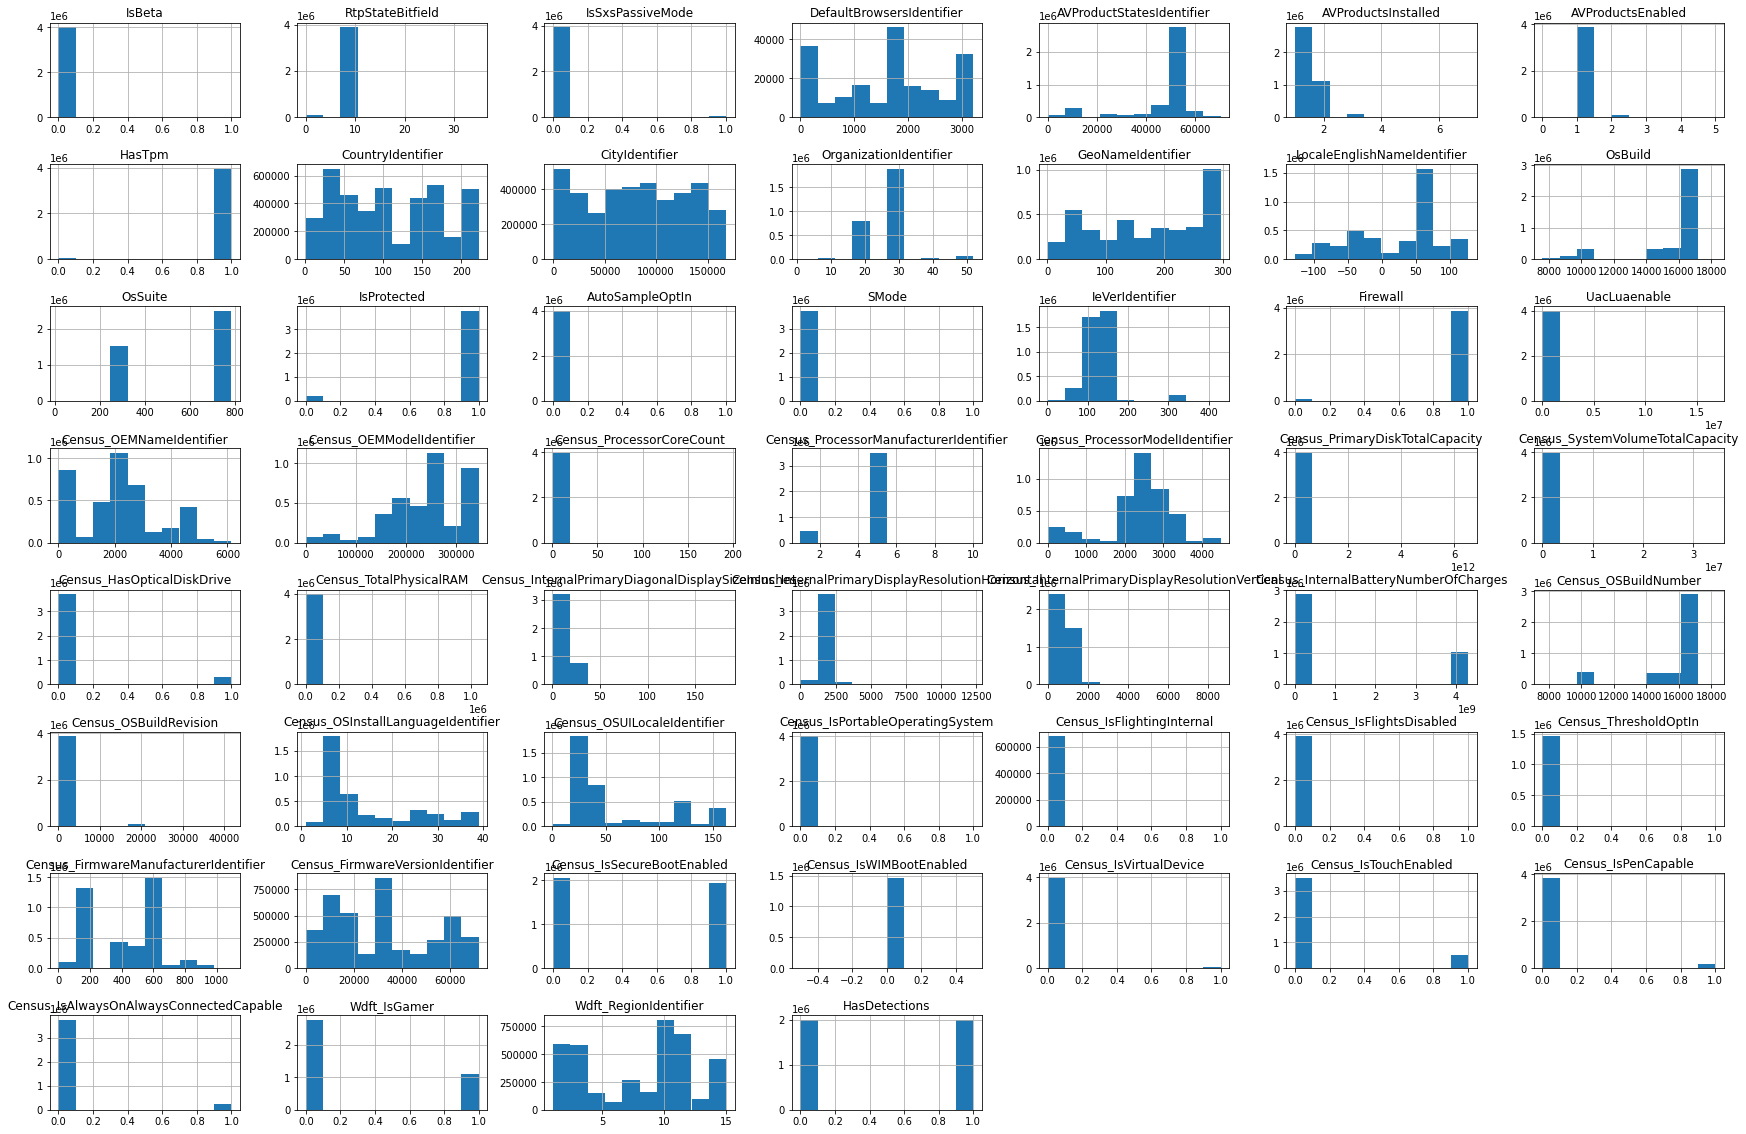

In [25]:
# Distribution of feature values
df_numeric.hist(figsize=(30,20))
plt.subplots_adjust(hspace=0.5);

### 2.7 Target Variable<a id='2.7_Target_Variable'></a>

In [26]:
# Distribution of the target variable
df['HasDetections'].value_counts()

0    2001796
1    1998204
Name: HasDetections, dtype: int64

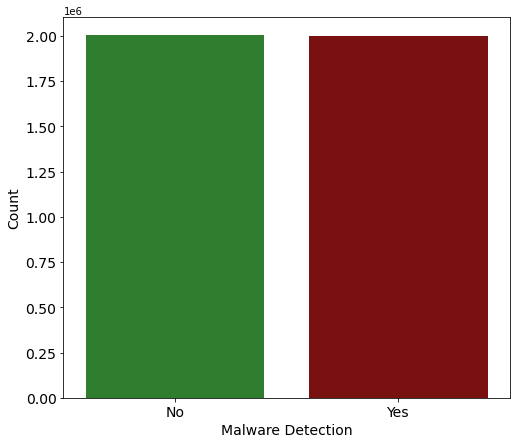

In [27]:
plt.figure(figsize=(8,7))
sns.countplot(x='HasDetections', data=df, palette=['forestgreen', 'darkred'])
plt.xticks([0,1], ['No', 'Yes'], fontsize= 14, color='black')
plt.yticks(fontsize= 14, color='black')
plt.xlabel('Malware Detection', fontsize=14, color='black')
plt.ylabel('Count',fontsize=14, color='black')
plt.show()

The target variable seem well balanced with almost equal number of entries. Imbalanceof distribution won't be a problem for the modelling scenarios.

In [22]:
# Drop columns with missing values using a threshold
# Drop any column with more than 30% missing values
#threshold = len(df) * 0.70
#df1 = df.dropna(thresh=threshold, axis=1)

In [ ]:
# save the data to a new csv file
datapath = '.../Capstone Project2/'
save_file(df, 'malware_cleaned_data.csv', datapath)